In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arquivo = 'E:\Dados_do_power_BI\cap_09\Mini_projeto\dataset.csv'.replace("\\","/")

In [3]:
df = pd.read_csv(arquivo, encoding = 'utf-8')

In [4]:
display(df)

,Unnamed: 0,fullvisitorid,date,channelgrouping,sessions,hits_today,pageviews_today,timeonsite_today,bounces_today,newvisits_today,...,hits_lt,pageviews_lt,timeonsite_lt,bounces_lt,transactions_lt,transactionrevenue_lt,transactions_target,transactionrevenue_target,operatingsystem,source_today
0,414,1252191219514313887,2017-04-25,Organic Search,1,6,5,292,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,b'iOS',b'google'
1,415,891125204708749564,2017-04-25,Organic Search,1,18,9,113,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,b'Windows',b'google'
2,416,5964009803422820623,2017-04-25,Organic Search,1,4,4,118,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,b'Windows',b'google'
3,417,8835679077262961520,2017-04-25,Social,1,5,5,261,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,b'Android',b'youtube'
4,418,9094560543523674756,2017-04-25,Organic Search,1,6,6,133,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,b'Windows',b'others'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94887,124895,7912737243863069491,2017-05-19,Social,1,3,3,34,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,b'Macintosh',b'youtube'
94888,124896,8239950188993198154,2017-05-19,Direct,1,3,3,62,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,b'Macintosh',b'direct'
94889,124897,2076251979479347353,2017-05-19,Referral,1,4,4,320,0,0,...,6.0,6.0,925.0,0.0,0.0,0.0,0,0,b'Macintosh',b'direct'
94890,124898,1103632435578717576,2017-05-19,Organic Search,1,6,6,67,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,b'Macintosh',b'google'


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'fullvisitorid', 'date', 'channelgrouping', 'sessions',
       'hits_today', 'pageviews_today', 'timeonsite_today', 'bounces_today',
       'newvisits_today', 'campaign_today', 'medium_today', 'keyword_today',
       'adcontent_today', 'ismobile', 'devicecategory', 'continent',
       'subcontinent', 'country', 'metro', 'city', 'visits_st', 'hits_st',
       'pageviews_st', 'timeonsite_st', 'bounces_st', 'transactions_st',
       'transactionrevenue_st', 'visits_lt', 'hits_lt', 'pageviews_lt',
       'timeonsite_lt', 'bounces_lt', 'transactions_lt',
       'transactionrevenue_lt', 'transactions_target',
       'transactionrevenue_target', 'operatingsystem', 'source_today'],
      dtype='object')


In [6]:
print(df['source_today'].unique())

["b'google'" "b'youtube'" "b'others'" "b'direct'" "b'partners'"
 "b'facebook'"]


#### Analise das colunas

- Unnamed - aparentemente é um coluna inutil
- fullvisitorid = Id completo de visita do usuario
- date = Data de acesso ao site
- channelgrouping = canal que gerou o acesso (midia organica, paga, afiliado)
- sessions = numeros de sessões no site
- hits_today = hits hoje
- pageviews_today = paginas acessadas na data em questão
- timeonsite_today = tempo ativo no site em segundos
- bounces_today = clicks de saida hoje
- newvisits_today = Novos visitantes hoje
- campaign_today = Campanha ativa na data que gerou a visita
- medium_today = Midia que gerou o acesso na data
- keyword_today = Palavra chave que gerou a visita
- adcontent_today = Conteudo do anuncio que gerou o clique
- ismobile = é dispositivo móvel
- devicecategory = Categoria do dispositivo
- continent = Continente
- subcontinent = Subcontinente
- country = país
- metro = Metrô
- city = Cidade
- visits_st = #indestiguivel
- transactions_target = transação alvo
- transactionrevenue_target = Receita da transação
- operatingsystem = Sistema operacional
- source_today = Mecânismo de pesquisa

### Definição dos problemas de negócio
Uma empresa comercializa produtos online. A empresa configurou o Google Analytics para extrair dados sobre o perfil dos visitantes do portal de e-commerce e agora o Gestor da área de Marketing gostaria de ter as respostas às perguntas abaixo:

1.Como os clientes mais acessam nosso portal, por busca orgânica ou paga?

2.Quanto tempo em média um visitante permanece em nosso portal por dia do mês?

3.Qual a principal fonte de acesso ao nosso portal?

4.Qual o sistema operacional mais usado para acessar nosso portal?

5.Qual o dispositivo mais usado para acesso ao nosso portal?

6.Qual o total de faturamento por dia?

#### 1.Como os clientes mais acessam nosso portal, por busca orgânica ou paga?

In [7]:
print(df['channelgrouping'].unique())

['Organic Search' 'Social' 'Direct' 'Referral' 'Paid Search' 'Affiliates'
 'Display' '(Other)']


In [8]:
print(f"organic search: {df[(df['channelgrouping'] == 'Organic Search')].shape[0]}")
print(f"paid search: {df[(df['channelgrouping'] == 'Paid Search')].shape[0]}")

organic search: 46528
paid search: 2627


#### 2.Quanto tempo em média um visitante permanece em nosso portal por dia do mês?

In [9]:
df[['Ano', 'Mes', 'Dia']] = df['date'].str.split('-', expand=True)
print(df['Mes'].unique())
print(df['Dia'].unique())
print(df['Ano'].unique())
print(df['timeonsite_today'].unique())

['04' '03' '05']
['25' '19' '30' '05' '02' '23' '21' '04' '13' '26' '11' '07' '20' '10'
 '18' '27' '28' '29' '03' '08' '24' '06' '17' '09' '15' '16' '31' '01'
 '22' '14' '12']
['2017']
[ 292  113  118 ... 2660 3264 2846]


In [10]:
df['fullvisitorid'] = df['fullvisitorid'].astype(str)

In [11]:
print(len(df['fullvisitorid']))

94892


In [12]:
df['Ano'] =df['Ano'].astype('int32')

In [13]:
df['Mes'] =df['Mes'].astype('int32')

In [14]:
df['Dia'] = df['Dia'].astype('int32')

In [15]:
df['timeonsite_today'].dtypes

dtype('int64')

In [16]:
meses = df['Mes'].unique()
meses.sort()

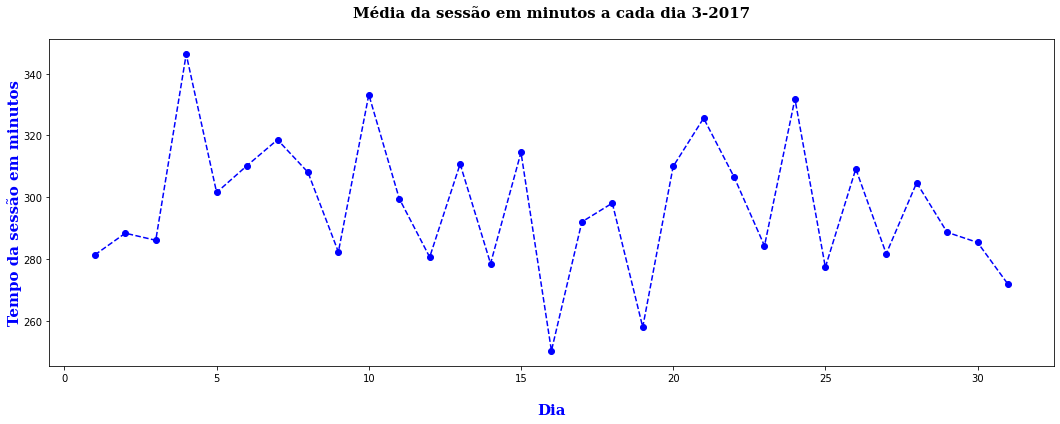

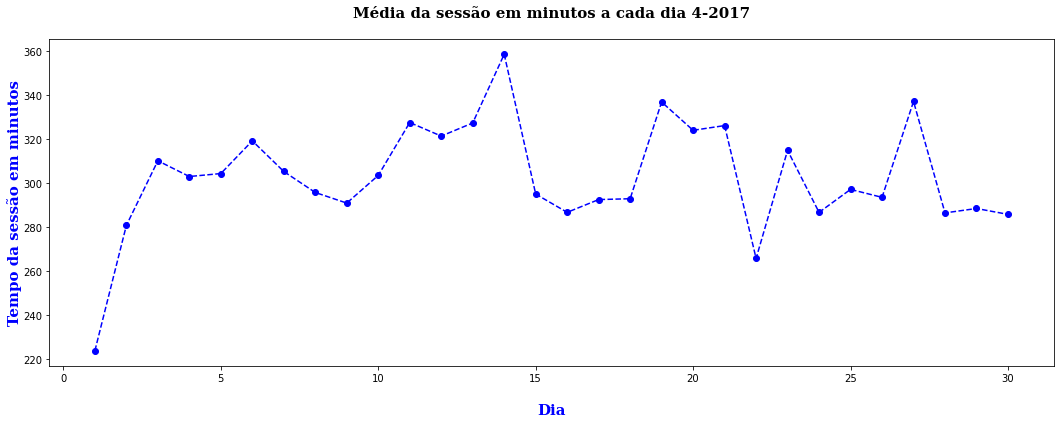

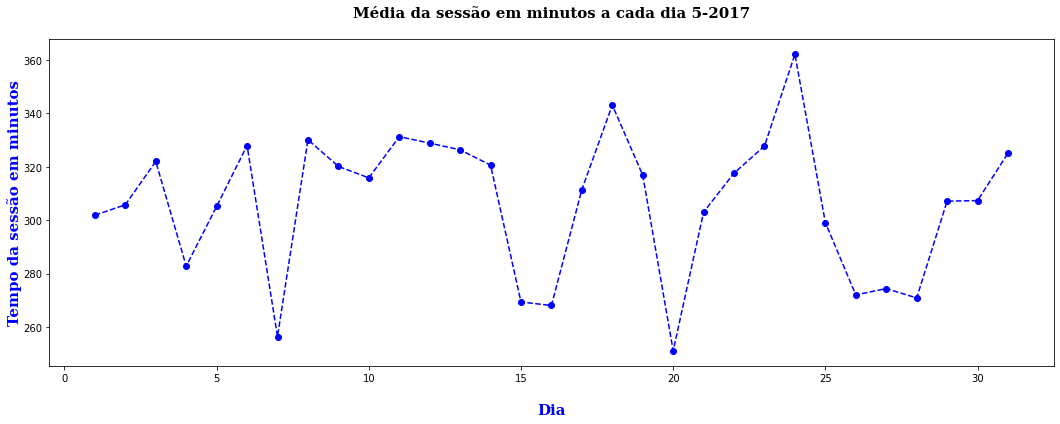

In [17]:
for mes in meses:
    new_df = df[df['Mes'] == mes]
    dias = new_df['Dia'].unique()
    dias.sort()
    medias = list()
    
    for dia in dias:
        new_df2 = new_df[new_df['Dia'] == dia]
        media = np.mean(new_df2['timeonsite_today'])
        medias.append(media)
        
    fig, ax = plt.subplots(figsize=(18,6))
    
    plt.plot(dias, medias, 'b--', marker = 'o')
    
    plt.title(f"Média da sessão em minutos a cada dia {mes}-2017\n", fontdict  = {'fontsize': '15',
                                                                                   'family': 'serif',
                                                                                   'fontweight': 'bold',
                                                                                   'color': 'black' }, loc = 'center')
    #configuração e estilos do label x
    plt.xlabel("\nDia", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue' }, loc = 'center')
    #configuração e estilos do label y
    plt.ylabel("Tempo da sessão em minutos", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue', 'verticalalignment': 'baseline',
                                            }, loc = 'center')
    
    
    plt.show()

#### 3. Qual a principal fonte de acesso ao nosso portal?

In [18]:
df['source_today'].unique()

array(["b'google'", "b'youtube'", "b'others'", "b'direct'", "b'partners'",
       "b'facebook'"], dtype=object)

In [19]:
fontes = df['source_today'].unique()

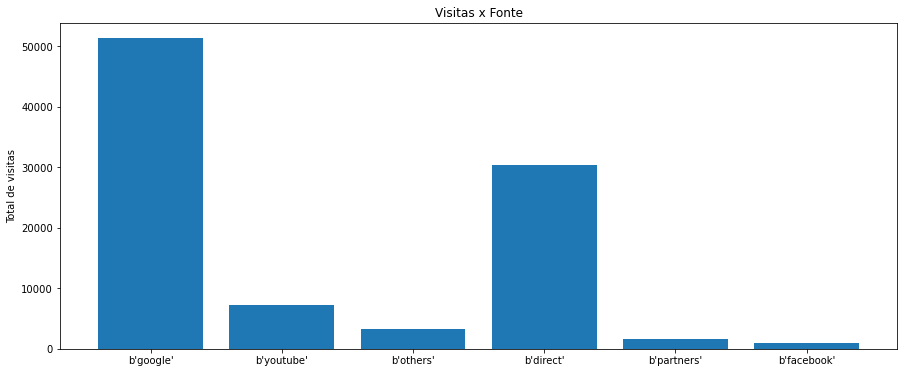

In [20]:
totals= list()
for fonte in fontes:
    new_df = df[df['source_today'] == fonte]
    totals.append(new_df.shape[0])

    
fig, ax = plt.subplots(figsize = (15, 6))

ax.bar(fontes, totals)

ax.set_ylabel('Total de visitas')
ax.set_title('Visitas x Fonte')

plt.show()

#### 4. Qual o sistema operacional mais usado para acessar nosso portal?

In [21]:
df['operatingsystem'].unique()

array(["b'iOS'", "b'Windows'", "b'Android'", "b'Macintosh'",
       "b'Chrome OS'", "b'Linux'", "b'Others'"], dtype=object)

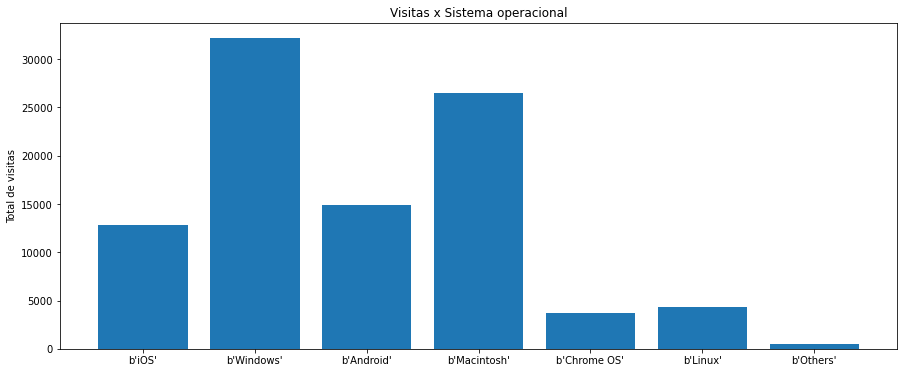

In [22]:
operatingsystem = df['operatingsystem'].unique()

totals = list()
for Osystem in operatingsystem:
    new_df = df[df['operatingsystem'] == Osystem]
    totals.append(new_df.shape[0])

    
fig, ax = plt.subplots(figsize = (15, 6))

ax.bar(operatingsystem, totals)

ax.set_ylabel('Total de visitas')
ax.set_title('Visitas x Sistema operacional')

plt.show()

#### 5. Qual o dispositivo mais usado para acesso ao nosso portal?

In [23]:
disps = df['devicecategory'].unique()

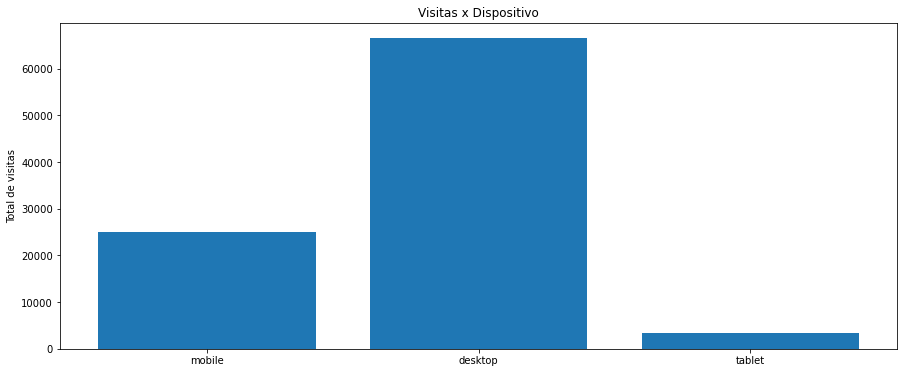

In [24]:
totals = list()
for disp in disps:
    new_df = df[df['devicecategory'] == disp]
    totals.append(new_df.shape[0])

fig, ax = plt.subplots(figsize = (15, 6))

ax.bar(disps, totals)

ax.set_ylabel('Total de visitas')
ax.set_title('Visitas x Dispositivo')

plt.show()

#### 6. Qual o total de faturamento por dia?

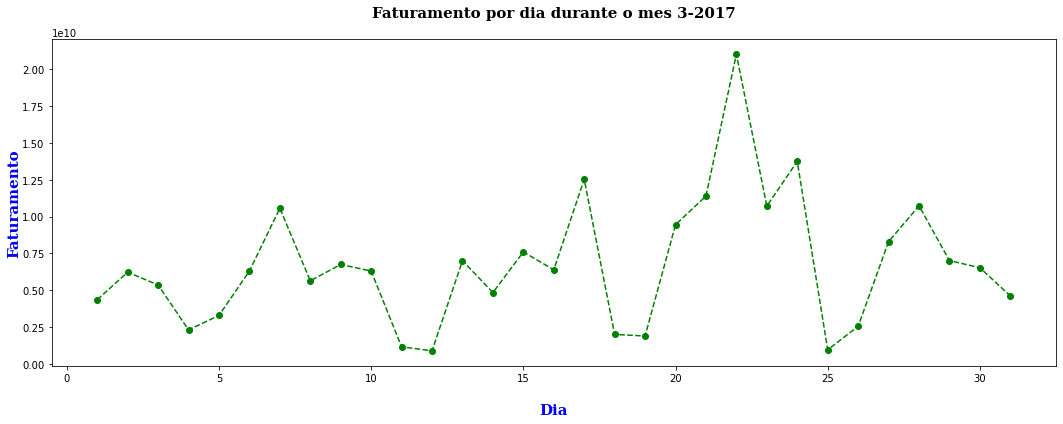

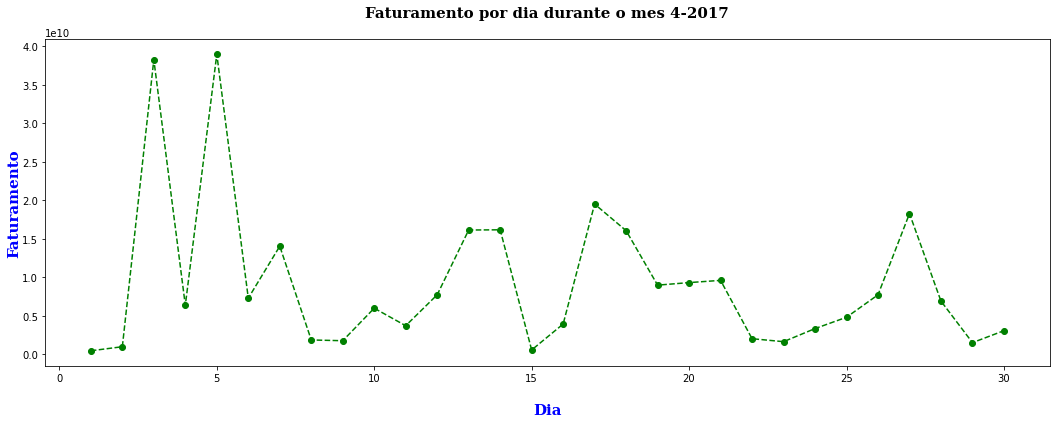

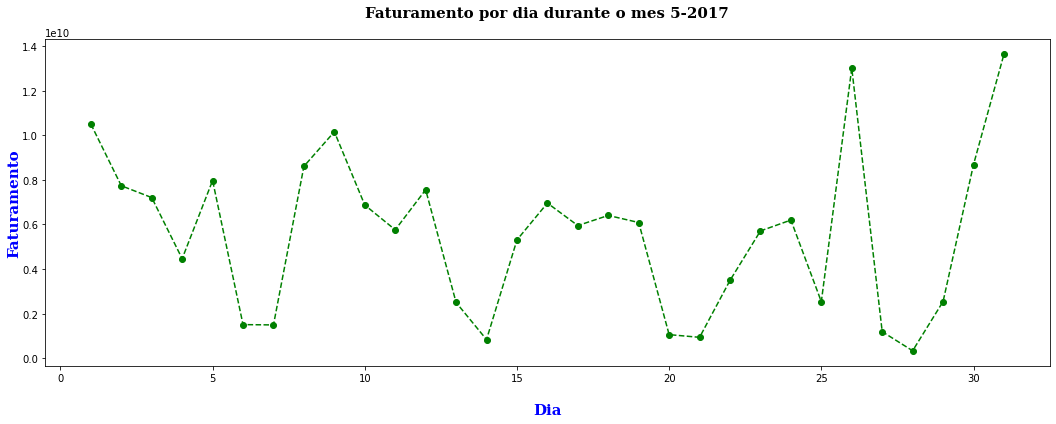

In [25]:
for mes in meses:
    new_df = df[df['Mes'] == mes]
    dias = new_df['Dia'].unique()
    dias.sort()
    faturamentos = list()
    
    for dia in dias:
        new_df2 = new_df[new_df['Dia'] == dia]
        fat = np.sum(new_df2['transactionrevenue_target'])
        faturamentos.append(fat)
    
    fig, ax = plt.subplots(figsize=(18,6))
    
    plt.plot(dias, faturamentos, 'g--', marker = 'o')
    
    plt.title(f"Faturamento por dia durante o mes {mes}-2017\n", fontdict  = {'fontsize': '15',
                                                                                   'family': 'serif',
                                                                                   'fontweight': 'bold',
                                                                                   'color': 'black' }, loc = 'center')
    #configuração e estilos do label x
    plt.xlabel("\nDia", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue' }, loc = 'center')
    #configuração e estilos do label y
    plt.ylabel("Faturamento", fontdict  = {'fontsize': '15',
                                           'family': 'serif',
                                           'fontweight': 'bold',
                                           'color': 'blue', 'verticalalignment': 'baseline',
                                            }, loc = 'center')
    
    
    plt.show()